In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from modules_generate_features import *
from modules_select_coin_backtest import *
from modules_select_coin_backtest_mp import *

In [65]:
trade_uni = get_trade_uni()
fea_lst = ["close", "close_BTC", "high", "low", "open", "quote_volume", "taker_base_volume", "taker_quote_volume",
            "trades", "volume"]

'''Parameters dict'''
freq = "1440min"
volatility_adjust = False
exec_mode = "longshort"
# 3 parameters
lookback_days = 19
holding_days = 27
threshold = 1.8

historical_data = get_historical_data(freq, fea_lst)

factor = generate_factor(historical_data)
ret = np.log(historical_data["close"]) - np.log(historical_data["close"].shift(1))
# check out sample result
out = 1
if not out:
    ret = ret.loc[ret.index <= "2021-12-31"]
factor = factor.reindex(index=ret.index)
coef_vol = adj_vol_coef(ret, STD_WINDOW, TARGET_VOL)
bt_dict = None
if exec_mode == "longshort":
    bt_dict = single_param_backtest(ret, factor, lookback_days, holding_days, threshold, coef_vol, volatility_adjust,
                                    exec_mode)
elif exec_mode == "timeseries":
    bt_dict = single_param_backtest(ret, factor, lookback_days, holding_days, threshold, coef_vol, volatility_adjust,
                                    exec_mode)

2024-04-07 17:21:35 1440min close data loaded
2024-04-07 17:21:35 1440min close_BTC data loaded
2024-04-07 17:21:35 1440min high data loaded
2024-04-07 17:21:35 1440min low data loaded
2024-04-07 17:21:35 1440min open data loaded
2024-04-07 17:21:35 1440min quote_volume data loaded
2024-04-07 17:21:35 1440min taker_base_volume data loaded
2024-04-07 17:21:35 1440min taker_quote_volume data loaded
2024-04-07 17:21:35 1440min trades data loaded
2024-04-07 17:21:35 1440min volume data loaded
2024-04-07 17:21:35 lookback_days 19 holding_days 27 threshold 1.8 BEGINS
2024-04-07 17:21:35 lookback_days 19 holding_days 27 threshold 1.8 ENDS


In [66]:
selected_products = bt_dict["basecode_return"].cumsum().iloc[-1, :].sort_values(ascending=False).index[:10].tolist()
pos = bt_dict["pos"].fillna(0)
print(f"{pos.loc[:, (pos != 0).any(axis=0)].shape[1]} products have positions")
pos_number = np.max(pos.ne(0).sum(axis=1))
print(f"cross-section has max {pos_number}")

77 products have positions
cross-section has max 58


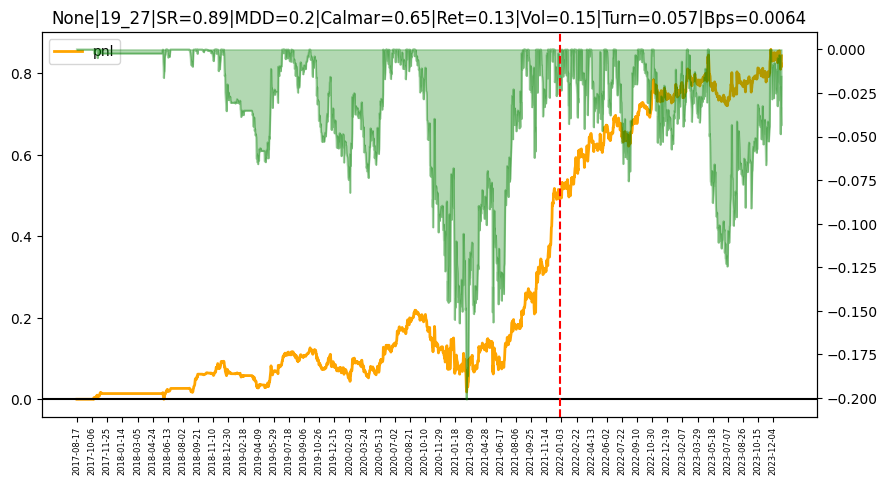

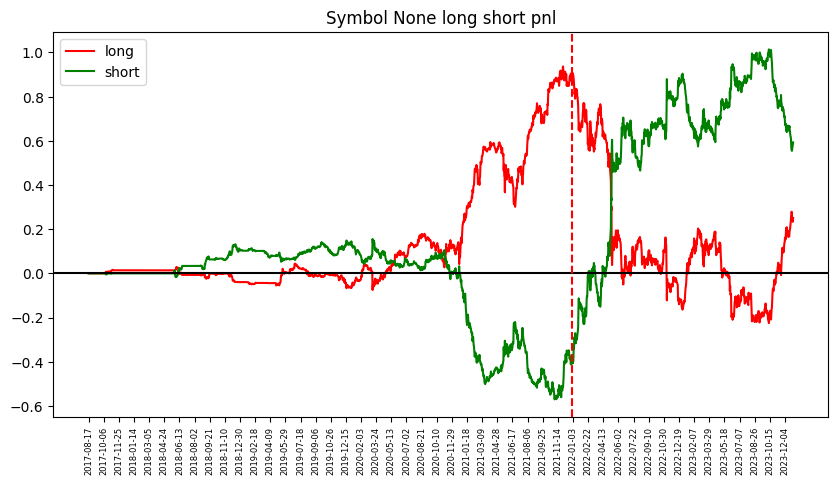

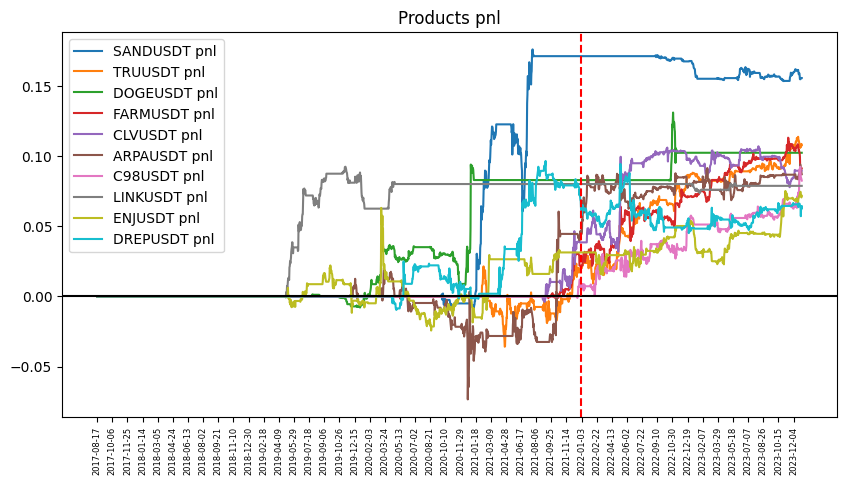

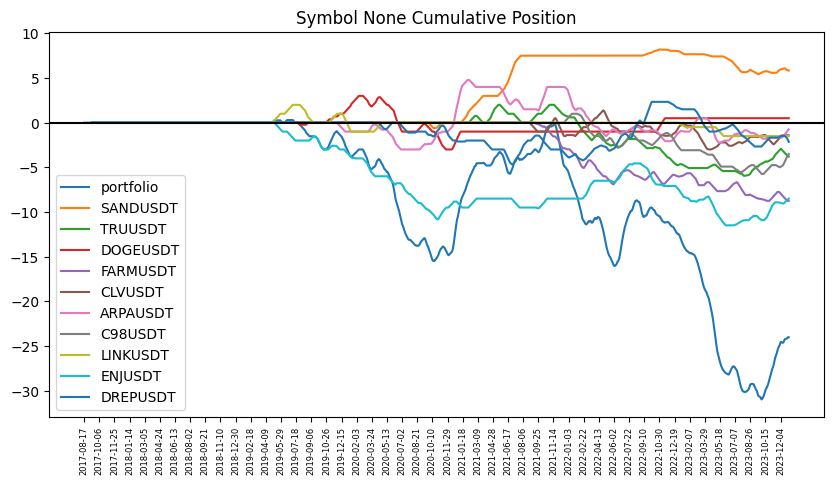

In [67]:
plot_pnl_general(bt_dict["basecode_return"], bt_dict["pos"], interval=50, best_param=f"{lookback_days}_{holding_days}")
plot_ls_pnl_general(ret, bt_dict["pos"])
plot_product_pnl_general(bt_dict["basecode_return"][selected_products])
plot_cumulative_pos_general(bt_dict["pos"][selected_products])
# plot_longshort_product_bar_general(bt_dict["pos"])